В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

<h1><center>Этапы работы: </center></h1>

1) [x] Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2) [x] Проведите первичный анализ.
- Проверьте данные на пропуски. Удалите в случае обнаружения.
- Нормализуйте один из признаков.

3) [x] Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4) [x] Обучите модель регрессии на обучающем множестве.

5) [x] Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

6) [x] Обучите дерево решений на обучающем множестве.
- Повторите п. 5 для полученной модели.
- Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

7) [x] Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
- Повторите п. 5 для полученной модели.

8) [x] Сформулируйте выводы по проделанной работе.
- Сравните точность двух моделей.
- Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler as z_scl

<h1><center>Load data</center></h1>

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.insert(8, column=data.target_names[0], value=data.target)

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<h1><center>EDA</center></h1>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df['HouseAge'] = z_scl().fit_transform(df[['HouseAge']])

<Axes: xlabel='MedHouseVal', ylabel='Count'>

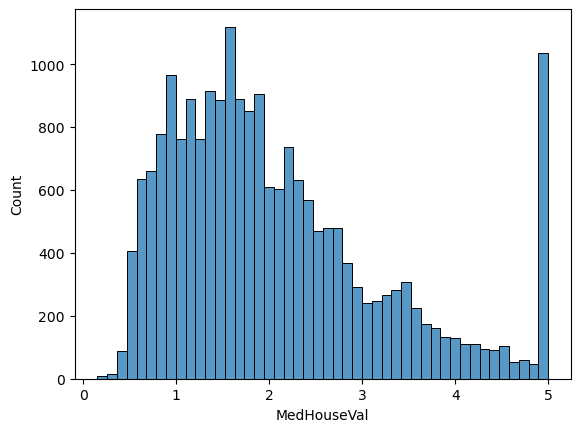

In [7]:
sns.histplot(data=df, x=df['MedHouseVal'])

In [8]:
X = df.drop(axis=1, columns='MedHouseVal')
y = df[['MedHouseVal']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

<h1><center>Linear Regression</center></h1>

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

model.fit(X_train, y_train)

yhat = model.predict(X_test)

In [11]:
model.score(X_test, y_test)

0.6112568432827629

<h1><center>Decision Tree</center></h1>

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [13]:
DTmodel = DecisionTreeRegressor(random_state=5)

In [14]:
DTmodel.fit(X_train, y_train)

DecisionTreeRegressor(random_state=5)

In [15]:
DTmodel.score(X_test, y_test)

0.6247925044307583

In [16]:
DTmodel_1 = DecisionTreeRegressor(max_depth=2, random_state=5)

In [17]:
DTmodel_1.fit(X_train, y_train)
DTmodel_1.score(X_test, y_test)

0.46297047205299224

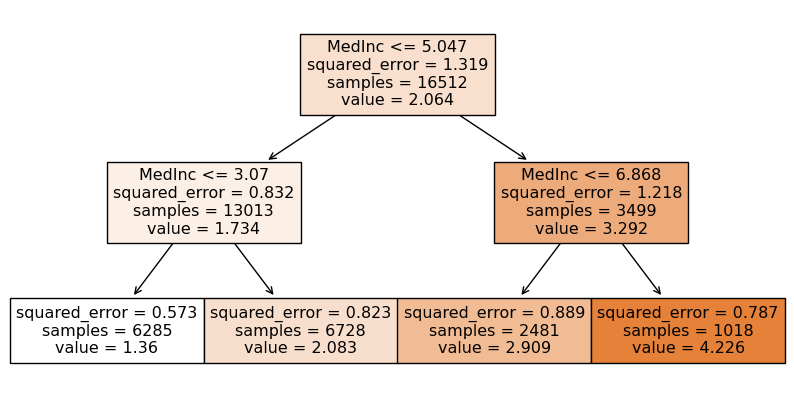

In [25]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(DTmodel_1, feature_names=df.columns, filled=True)

In [52]:
DTmodel_2 = DecisionTreeRegressor(max_depth=10, min_samples_split=100, random_state=5)

In [53]:
DTmodel_2.fit(X_train, y_train)
DTmodel_2.score(X_test, y_test)

0.7311246486970886

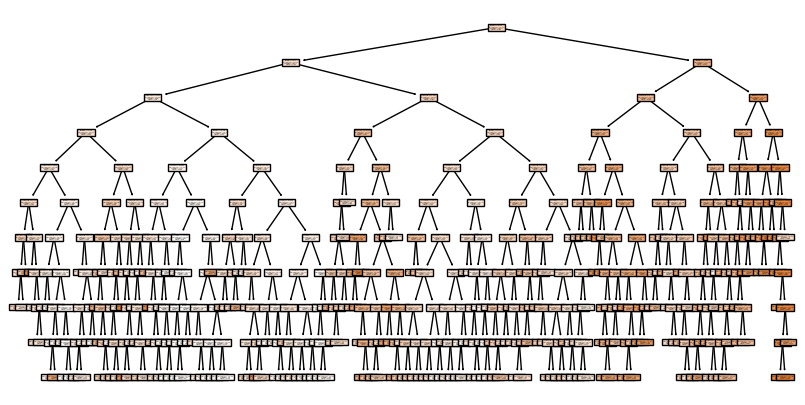

In [54]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(DTmodel_2, feature_names=df.columns, filled=True)

<h1><center>Выводы</center></h1>

- Точность Линейной регрессии (61%)
- Точность Первой (простой) модели Дерева - 62%
- Точность Второй модели (с искусственно урезанной глубиной) - 46%
- Точность Третьей модели (с урезанной глубиной и мин. количеством "отсечки") - 73%

Таким образом, с помощью Дерева решений регрессии в принципе можно решать подобные задачи, но модель получается слишком громоздкой. Всё-таки, Дерево решений в таких банальных случаях подходит лучше для классификации.

В практической работе я бы стал использовать Дерево решений:
1) в качестве одной из составляющих моделей в ансамбле
2) в качестве инструмента feature selection
3) в качестве рабочей модели для какой-нибудь громоздкой классификации (не бинарной, а полиномиальной) как альтернативный инструмент линейным моделям